# Demo of pywebcat

In [1]:
import itertools
from pywebcat.utils import WebCAT

### Instantiate WebCAT class

In [2]:
wc = WebCAT()

### Set the url & view some properties

In [3]:
wc.generate_url("buxtoncoastalcam", 2019, 11, 13, 1000)
print(f"Generated url: {wc.url}")
print(f"Generated name: {wc.name}")
print(f"Frame width: {wc.width}")
print(f"Frame height: {wc.height}")
print(f"Total frames: {wc.frames}")
print(f"FPS: {wc.fps}")

Generated url: http://webcat-video.axds.co/buxtoncoastalcam/raw/2019/2019_11/2019_11_13/buxtoncoastalcam.2019-11-13_1000.mp4
Generated name: buxtoncoastalcam_2019_11_13_1000
Frame width: 1280
Frame height: 720
Total frames: 17097
FPS: 28


### View some frames

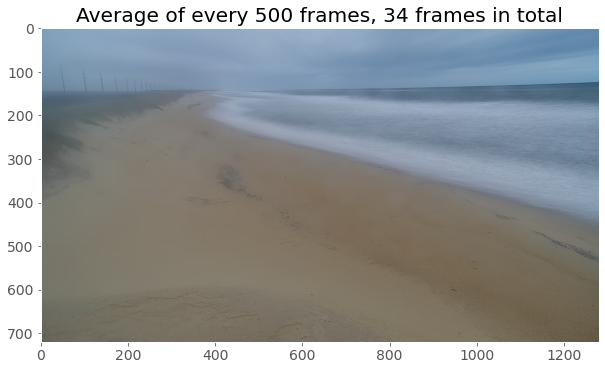

In [4]:
# view average frame
step = 500 # average of every N frames
a = wc.plot_average_frame(step)

### Download video to local file (optional)

In [7]:
# wc.download_url()

### Save frames of video to .jpg files & write paths to .csv file

In [8]:
wc.save_frames(delta_t=100, fout_path="./", save_csv=True)
pd.read_csv('buxtoncoastalcam_2019_11_13_1000.csv', index_col=0).head()

,url,name,frame,path
0,http://webcat-video.axds.co/buxtoncoastalcam/r...,buxtoncoastalcam_2019_11_13_1000,0,./jpg/frame_0.jpg
1,http://webcat-video.axds.co/buxtoncoastalcam/r...,buxtoncoastalcam_2019_11_13_1000,2800,./jpg/frame_2800.jpg
2,http://webcat-video.axds.co/buxtoncoastalcam/r...,buxtoncoastalcam_2019_11_13_1000,5600,./jpg/frame_5600.jpg
3,http://webcat-video.axds.co/buxtoncoastalcam/r...,buxtoncoastalcam_2019_11_13_1000,8400,./jpg/frame_8400.jpg
4,http://webcat-video.axds.co/buxtoncoastalcam/r...,buxtoncoastalcam_2019_11_13_1000,11200,./jpg/frame_11200.jpg


### Looping

The `WebCAT()` class is constructed such that you can pass new urls without having to re-instantiate the class (good for looping!). We can do some clever tricks with `itertools` for efficient looping within a module. **However**, if you're interested in looping over videos to extract and save frames, it is recommended to use the CLI, as described in the [README](../README.md).

In [9]:
station = ["buxtoncoastalcam"]
year = [2018]
month = [11]
day = [13]
times = [1000, 2000]  # multiple times to loop through

In [10]:
for item in itertools.product(station, year, month, day, times):
    wc.generate_url(*item)
    print(f"Generated url: {wc.url}")
    # do more stuff like save frames for each video

Generated url: http://webcat-video.axds.co/buxtoncoastalcam/raw/2018/2018_11/2018_11_13/buxtoncoastalcam.2018-11-13_1000.mp4
Generated url: http://webcat-video.axds.co/buxtoncoastalcam/raw/2018/2018_11/2018_11_13/buxtoncoastalcam.2018-11-13_2000.mp4
